In [1]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('../data/online_retail.db')

ltv_df = pd.read_sql_query("SELECT * FROM customer_features;", connection)

ltv_df.head()

,CustomerID,num_orders,total_spent,avg_order_value,first_purchase_date,last_purchase_date,tenure_days,recency_days,avg_days_between_orders
0,12346.0,2,0.00,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00,0.011111,325.571528,0.011111
1,12347.0,7,4310.00,615.71,2010-12-07 14:57:00,2011-12-07 15:52:00,365.038194,2.338889,60.839699
2,12348.0,4,1797.24,449.31,2010-12-16 19:09:00,2011-09-25 13:13:00,282.752778,75.449306,94.250926
3,12349.0,1,1757.55,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,0.000000,18.589583,NaN
4,12350.0,1,334.40,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,0.000000,310.332639,NaN


In [2]:
y = ltv_df['total_spent']

X = ltv_df.drop(columns=[
    'CustomerID', 
    'total_spent', 
    'first_purchase_date', 
    'last_purchase_date'
])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  404.40
RMSE: 3575.57
R²:   0.82


Matplotlib is building the font cache; this may take a moment.


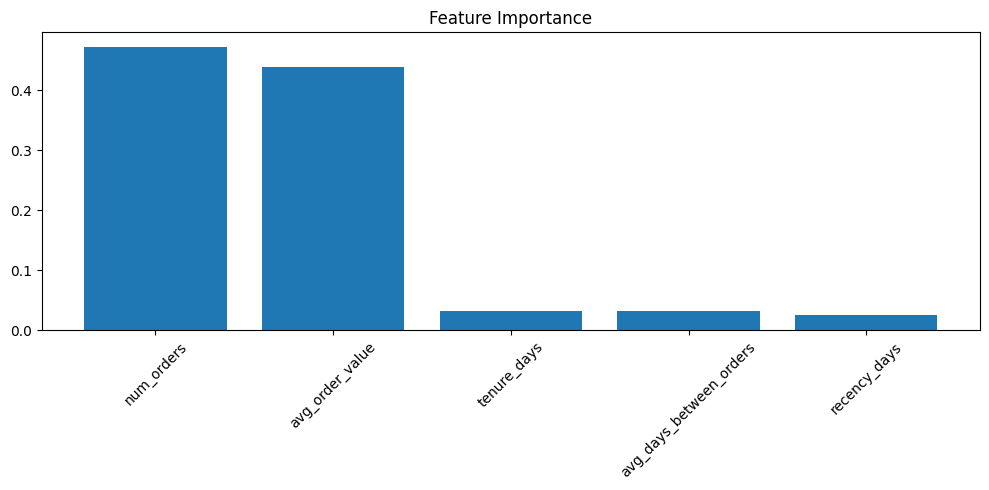

In [7]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()
